In [3]:
import pandas as pd
import numpy
import re
from newspaper import Article

In [2]:
df = pd.read_csv('www.foxnews.com-4chan-2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2385 non-null   int64  
 1   _index                 2385 non-null   object 
 2   _type                  2385 non-null   object 
 3   _id                    2385 non-null   object 
 4   _score                 2385 non-null   float64
 5   _source.archivedon     2385 non-null   float64
 6   _source.board          2385 non-null   object 
 7   _source.chan           2385 non-null   int64  
 8   _source.com            2385 non-null   object 
 9   _source.htmlparsedcom  2385 non-null   object 
 10  _source.id             2385 non-null   int64  
 11  _source.name           2384 non-null   object 
 12  _source.no             2385 non-null   int64  
 13  _source.now            2385 non-null   object 
 14  _source.resto          2385 non-null   int64  
 15  _sou

In [3]:
df_pol = df[df['_source.board'] == 'pol']
df_pol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 2 to 2384
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1696 non-null   int64  
 1   _index                 1696 non-null   object 
 2   _type                  1696 non-null   object 
 3   _id                    1696 non-null   object 
 4   _score                 1696 non-null   float64
 5   _source.archivedon     1696 non-null   float64
 6   _source.board          1696 non-null   object 
 7   _source.chan           1696 non-null   int64  
 8   _source.com            1696 non-null   object 
 9   _source.htmlparsedcom  1696 non-null   object 
 10  _source.id             1696 non-null   int64  
 11  _source.name           1695 non-null   object 
 12  _source.no             1696 non-null   int64  
 13  _source.now            1696 non-null   object 
 14  _source.resto          1696 non-null   int64  
 15  _sou

In [5]:
df_pol["_source.urls"].value_counts()

['https://youtu.be/Cki0RVX841I', 'https://archive.vn/AL8u5', 'https://en.wikipedia.org/wiki/Shomrim_(neighborhood_watch_group)', 'https://youtu.be/WlINbptS4_g', 'https://archive.vn/fQfM4', 'https://archive.vn/GYWUJ', 'https://archive.vn/JFgbP', 'https://en.wikipedia.org/wiki/Randi_Weingarten', 'https://www.foxnews.com/us/randi-weingarten-parental-rights-bills-the-way-in-which-wars-start', 'https://archive.vn/OqCTH', 'https://twitter.com/HelenAnn16/status/1517192460631478273', 'https://archive.vn/4AlPT', 'https://archive.vn/alcjD', 'https://gab.com/TooGrizzlyToBear/posts/108380046674563915', 'https://archive.vn/4WT48', 'https://christiansfortruth.com/israeli-court-rules-jew-convicted-of-running-international-child-porn-ring-safe-to-practice-as-pediatrician/']                                                                                                                                                                                            24
['https://christiansfortruth.com/israeli-

In [6]:
df_pol["_source.urls"] = df_pol["_source.urls"].apply(eval)

C:\Users\aviko\AppData\Local\Temp\ipykernel_11120\294445977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pol["_source.urls"] = df_pol["_source.urls"].apply(eval)


In [7]:
df_pol_long = df_pol.explode('_source.urls')

In [8]:
df_pol_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6553 entries, 2 to 2384
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6553 non-null   int64  
 1   _index                 6553 non-null   object 
 2   _type                  6553 non-null   object 
 3   _id                    6553 non-null   object 
 4   _score                 6553 non-null   float64
 5   _source.archivedon     6553 non-null   float64
 6   _source.board          6553 non-null   object 
 7   _source.chan           6553 non-null   int64  
 8   _source.com            6553 non-null   object 
 9   _source.htmlparsedcom  6553 non-null   object 
 10  _source.id             6553 non-null   int64  
 11  _source.name           6552 non-null   object 
 12  _source.no             6553 non-null   int64  
 13  _source.now            6553 non-null   object 
 14  _source.resto          6553 non-null   int64  
 15  _sou

In [9]:
df_pol_long['_source.urls']

2       https://www.foxnews.com/health/new-york-florid...
3       https://www.foxnews.com/politics/flashback-joe...
4                https://i.4cdn.org/pol/1641061659696.png
4       https://www.foxnews.com/politics/ron-desantis-...
6       https://www.foxnews.com/entertainment/steve-ca...
                              ...                        
2383    https://www.pbs.org/newshour/nation/ex-u-s-hou...
2383    https://apnews.com/article/f0aca550dabc4e4c9c6...
2384    https://archive.org/details/fundamentallaws00o...
2384    https://wikispooks.com/wiki/2001_Mexican_legis...
2384    https://www.foxnews.com/us/california-schools-...
Name: _source.urls, Length: 6553, dtype: object

In [31]:
regex = '^https://www.foxnews.com'
df_pol_long_fox = df_pol_long.loc[df_pol_long['_source.urls'].str.match(regex, na=False)]

In [34]:
df_pol_long_fox_uq = df_pol_long_fox.drop_duplicates(subset = '_source.urls')

In [35]:
df_pol_long_fox_uq['_source.urls'].nuniqueque()

1010

In [62]:
test_url = df_pol_long_fox_uq.iloc[0]['_source.urls']
test_article = Article(test_url)
test_article.download()
test_article.parse()
regex2 = re.compile(r'^NEW You can now listen to Fox News articles!')
if regex2.match(test_article.text):
    test_article.text = test_article.text[44:]
test_article.text

"\n\nNew York and Florida have both recorded their highest-ever single-day total of new COVID-19 cases in recent days as new cases surge all over the United States.\n\nNew York set a record of 85,476 cases on Saturday, breaking the state's record set just days earlier. The surge in cases came amid high numbers of testing.\n\nFlorida recorded 75,900 cases on Dec. 31, marking the fourth time in seven days that Florida has broken its record, which has raised the 7-day average to 42,600 - twice as much as this past summer’s surge thanks to the delta variant.\n\nOMICRON VARIANT MAY IMPACT LUNGS DIFFERENTLY, STUDIES SAY\n\nFlorida usually only reports numbers on a Friday, but it feeds daily numbers to the CDC, which is where the new numbers came from. The Florida Department of Health will remain closed throughout the New Year’s holiday weekend, meaning new numbers will not be available until the following week, WFLA reported.\n\nOMICRON LOOKS TO BRING IN NEW YEAR WITH HIGHEST CASELOADS RECOR

"\n\nNew York and Florida have both recorded their highest-ever single-day total of new COVID-19 cases in recent days as new cases surge all over the United States.\n\nNew York set a record of 85,476 cases on Saturday, breaking the state's record set just days earlier. The surge in cases came amid high numbers of testing.\n\nFlorida recorded 75,900 cases on Dec. 31, marking the fourth time in seven days that Florida has broken its record, which has raised the 7-day average to 42,600 - twice as much as this past summer’s surge thanks to the delta variant.\n\nOMICRON VARIANT MAY IMPACT LUNGS DIFFERENTLY, STUDIES SAY\n\nFlorida usually only reports numbers on a Friday, but it feeds daily numbers to the CDC, which is where the new numbers came from. The Florida Department of Health will remain closed throughout the New Year’s holiday weekend, meaning new numbers will not be available until the following week, WFLA reported.\n\nOMICRON LOOKS TO BRING IN NEW YEAR WITH HIGHEST CASELOADS RECOR

In [63]:
articles_df = pd.DataFrame()

In [64]:
i = 1
for article in df_pol_long_fox_uq['_source.urls']:
    article = Article(article)
    article.download()
    article.parse()
    
    temp_df = pd.DataFrame(columns = ['Title', 'Authors', 'Text', 'Summary', 'published_date', 'Source'])
    
    if regex2.match(article.text):
        article.text = article.text[44:]
    
    temp_df['Authors'] = article.authors
    temp_df['Title'] = article.title
    temp_df['Text'] = article.text
    temp_df['Summary'] = article.summary
    temp_df['published_date'] = article.publish_date
    temp_df['Source'] = article.source_url
    
    articles_df = pd.concat([articles_df, temp_df], ignore_index=True)
    print("Row " + f'{i}' + " added.")
    i = i+1

Row 1 added.
Row 2 added.
Row 3 added.
Row 4 added.
Row 5 added.
Row 6 added.
Row 7 added.
Row 8 added.
Row 9 added.
Row 10 added.
Row 11 added.
Row 12 added.
Row 13 added.
Row 14 added.
Row 15 added.
Row 16 added.
Row 17 added.
Row 18 added.
Row 19 added.
Row 20 added.
Row 21 added.
Row 22 added.
Row 23 added.
Row 24 added.
Row 25 added.
Row 26 added.
Row 27 added.
Row 28 added.
Row 29 added.
Row 30 added.
Row 31 added.
Row 32 added.
Row 33 added.
Row 34 added.
Row 35 added.
Row 36 added.
Row 37 added.
Row 38 added.
Row 39 added.
Row 40 added.
Row 41 added.
Row 42 added.
Row 43 added.
Row 44 added.
Row 45 added.
Row 46 added.
Row 47 added.
Row 48 added.
Row 49 added.
Row 50 added.
Row 51 added.
Row 52 added.
Row 53 added.
Row 54 added.
Row 55 added.
Row 56 added.
Row 57 added.
Row 58 added.
Row 59 added.
Row 60 added.
Row 61 added.
Row 62 added.
Row 63 added.
Row 64 added.
Row 65 added.
Row 66 added.
Row 67 added.
Row 68 added.
Row 69 added.
Row 70 added.
Row 71 added.
Row 72 added.
R

ArticleException: Article `download()` failed with 404 Client Error: Not Found for url: https://www.foxnews.com/politics/putin-nukes on URL https://www.foxnews.com/politics/putin-nukes

In [69]:
df_pol_long_fox_uq.loc[df_pol_long_fox_uq['_source.urls'] == 'https://www.foxnews.com/politics/putin-nukes']

,Unnamed: 0,_index,_type,_id,_score,_source.archivedon,_source.board,_source.chan,_source.com,_source.htmlparsedcom,...,_source.customspoiler,_source.sub,_source.trip,_source.since4pass,_source.capcode,_source.sticky,_source.stickycap,_source.tailsize,_source.archived,_source.closed
801,801,smat-4chan-data-000007,_doc,pol_368245221,12.852767,1.647764e+09,pol,1,"<a href=""#p368245155"" class=""quotelink"">&gt;&g...",>>368245155>>368245155>68245155▶>its all over ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df_pol_long_fox_uq.iloc[922]['_source.urls']

'https://www.foxnews.com/politics/multiple-texas-counties-declare-border-crisis-invasion-numbers-increase)'

In [127]:
df_pol_long_fox_uq.loc[df_pol_long_fox_uq['_source.urls'] == 'https://www.foxnews.com/world/ukraine-reality-conflict-putin-zelensky', df_pol_long_fox_uq['_source.urls']] = 'https://www.foxnews.com/world/ukraine-reality-conflict-putin-zelenskyy'

In [133]:
i = 923
for article in df_pol_long_fox_uq.iloc[923:]['_source.urls']:
    article = Article(article)
    article.download()
    article.parse()
    
    temp_df = pd.DataFrame(columns = ['Title', 'Authors', 'Text', 'Summary', 'published_date', 'Source'])
    
    if regex2.match(article.text):
        article.text = article.text[44:]
    
    temp_df['Authors'] = article.authors
    temp_df['Title'] = article.title
    temp_df['Text'] = article.text
    temp_df['Summary'] = article.summary
    temp_df['published_date'] = article.publish_date
    temp_df['Source'] = article.source_url
    
    articles_df = pd.concat([articles_df, temp_df], ignore_index=True)
    print("Row " + f'{i}' + " added.")
    i = i+1

Row 923 added.
Row 924 added.
Row 925 added.
Row 926 added.
Row 927 added.
Row 928 added.
Row 929 added.
Row 930 added.
Row 931 added.
Row 932 added.
Row 933 added.
Row 934 added.
Row 935 added.
Row 936 added.
Row 937 added.
Row 938 added.
Row 939 added.
Row 940 added.
Row 941 added.
Row 942 added.
Row 943 added.
Row 944 added.
Row 945 added.
Row 946 added.
Row 947 added.
Row 948 added.
Row 949 added.
Row 950 added.
Row 951 added.
Row 952 added.
Row 953 added.
Row 954 added.
Row 955 added.
Row 956 added.
Row 957 added.
Row 958 added.
Row 959 added.
Row 960 added.
Row 961 added.
Row 962 added.
Row 963 added.
Row 964 added.
Row 965 added.
Row 966 added.
Row 967 added.
Row 968 added.
Row 969 added.
Row 970 added.
Row 971 added.
Row 972 added.
Row 973 added.
Row 974 added.
Row 975 added.
Row 976 added.
Row 977 added.
Row 978 added.
Row 979 added.
Row 980 added.
Row 981 added.
Row 982 added.
Row 983 added.
Row 984 added.
Row 985 added.
Row 986 added.
Row 987 added.
Row 988 added.
Row 989 ad

In [4]:
articles_df = articles_df.drop_duplicates(subset='Text')
articles_df

,Unnamed: 0,Title,Authors,Text,Source
0,0,"New York, Florida shatter single-day records f...",Peter Aitken,\n\nNew York and Florida have both recorded th...,https://www.foxnews.com
1,1,"Flashback: Biden praised ‘constant,' 'unrelent...",Adam Shaw,"\n\nPresident-elect Joe Biden, during the Obam...",https://www.foxnews.com
2,2,Ron DeSantis accompanied wife to cancer treatm...,Kyle Morris,\n\nFlorida Republican Gov. Ron DeSantis accom...,https://www.foxnews.com
3,3,"Steve Carell, Seth Rogen among Hollywood stars...",Nate Day,\n\nHollywood stars are taking a stand.\n\nOn ...,https://www.foxnews.com
4,4,"Just one year after defund the police cuts, Po...",Emma Colton,\n\nA year after Portland cut funds to its pol...,https://www.foxnews.com
...,...,...,...,...,...
852,1147,Mayor Bowser claims illegal immigrants crowdin...,Lindsay Kornick,\n\nWashington D.C. Mayor Muriel Bowser appear...,https://www.foxnews.com
853,1148,Mueller witness George Nader pleads guilty to ...,Gregg Re,\n\nA political hobnobber who featured promine...,https://www.foxnews.com
854,1149,Minnesota state lawmaker ends reelection bid a...,Paulina Dedaj,\n\nMinnesota state Rep. Jim Knoblach announce...,https://www.foxnews.com
855,1150,Former lawmaker facing sex abuse probe was 'co...,Lukas Mikelionis,\n\nThe former Idaho state lawmaker who was fo...,https://www.foxnews.com


In [144]:
articles_df.to_csv('foxnews_4chan_articles_2022.csv')

In [4]:
articles_df = pd.read_csv('foxnews_4chan_articles_2022.csv')

In [163]:
import pickle
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import remove_stopwords

In [164]:
def read_corpus(fname, tokens_only=False):
    for i, line in enumerate(fname):
        tokens = gensim.parsing.preprocessing.preprocess_string(line, [lambda x: x.lower(), strip_multiple_whitespaces, remove_stopwords])
        if tokens_only:
            yield tokens
        else:
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

corpus = list(read_corpus(articles_df['Text']))

In [165]:
corpus[0]

TaggedDocument(words=['new', 'york', 'florida', 'recorded', 'highest-ever', 'single-day', 'total', 'new', 'covid-19', 'cases', 'recent', 'days', 'new', 'cases', 'surge', 'united', 'states.', 'new', 'york', 'set', 'record', '85,476', 'cases', 'saturday,', 'breaking', "state's", 'record', 'set', 'days', 'earlier.', 'surge', 'cases', 'came', 'amid', 'high', 'numbers', 'testing.', 'florida', 'recorded', '75,900', 'cases', 'dec.', '31,', 'marking', 'fourth', 'time', 'seven', 'days', 'florida', 'broken', 'record,', 'raised', '7-day', 'average', '42,600', '-', 'twice', 'past', 'summer’s', 'surge', 'thanks', 'delta', 'variant.', 'omicron', 'variant', 'impact', 'lungs', 'differently,', 'studies', 'florida', 'usually', 'reports', 'numbers', 'friday,', 'feeds', 'daily', 'numbers', 'cdc,', 'new', 'numbers', 'came', 'from.', 'florida', 'department', 'health', 'remain', 'closed', 'new', 'year’s', 'holiday', 'weekend,', 'meaning', 'new', 'numbers', 'available', 'following', 'week,', 'wfla', 'reported

In [166]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=300)

In [167]:
model.build_vocab(corpus)

In [168]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [169]:
model.dv[0]

array([-1.8239394 ,  5.3011403 , -3.6722946 , -1.4600526 ,  2.4059646 ,
       -3.3760803 , -0.8800646 , -1.7096912 , -5.6684065 ,  1.6000705 ,
       -0.50113356, -0.7875627 , -3.014291  ,  1.5318509 , -0.04271149,
       -5.0606318 , -4.0665584 , -3.8593156 , -1.1438051 , -3.3797154 ,
        3.8691792 ,  2.3922038 ,  0.41400465, -0.45740303,  2.6572285 ,
       -0.9463183 , -4.157504  , -7.192621  , -5.194814  , -1.1737678 ,
        0.44204625,  0.7605237 ,  0.00918956, -0.44076735, -1.2124684 ,
        0.02072281, -0.71897614, -5.7943573 ,  0.06057153, -3.6752496 ,
       -1.378452  , -1.2495313 ,  2.1707034 , -2.1497068 ,  0.17639661,
       -0.6092202 ,  2.172127  ,  0.42239174,  1.2659575 ,  2.205971  ,
       -2.6493292 , -0.22438905,  1.9455478 , -2.0758996 , -0.8891987 ,
       -0.554094  , -0.81942004, -1.4487054 , -5.4470434 ,  5.8563786 ,
        3.2224479 , -0.04809997,  1.7119279 , -2.250302  , -2.175989  ,
        5.6500535 , -0.7484551 ,  3.8604288 , -8.025825  ,  5.93

In [170]:
similarity_test = model.dv.most_similar(450)

In [171]:
similarity_test

[(756, 0.6022321581840515),
 (666, 0.5684049129486084),
 (458, 0.5414828658103943),
 (835, 0.5222352743148804),
 (386, 0.519696831703186),
 (427, 0.5069794654846191),
 (467, 0.5052911043167114),
 (446, 0.5051029324531555),
 (724, 0.502781867980957),
 (127, 0.4975874722003937)]

In [172]:
i = 0
while i <= 9:
    print(f'#{i + 1} ' + 'similar document to ' +  f'\"{articles_df["Title"][450]}\"' + ' is ' + f'\"{articles_df["Title"][similarity_test[i][0]]}\"')
    i+=1

#1 similar document to "Liberals melt down after Musk claims the Democrat Party was ‘hijacked by extremists'" is "Rob Schneider slams Alec Baldwin's 'SNL' Trump portrayal: 'I don't find his impression to be comical'"
#2 similar document to "Liberals melt down after Musk claims the Democrat Party was ‘hijacked by extremists'" is "Ron DeSantis’ joke about ‘African-American support’ from Elon Musk slammed by liberal media: ‘This is sick’"
#3 similar document to "Liberals melt down after Musk claims the Democrat Party was ‘hijacked by extremists'" is "Pelosi's daughter calls glitzy WHCA dinner a 'bigger threat to our democracy' than Elon Musk"
#4 similar document to "Liberals melt down after Musk claims the Democrat Party was ‘hijacked by extremists'" is "LeBron James rips Celtics fans: 'They racist as f---'"
#5 similar document to "Liberals melt down after Musk claims the Democrat Party was ‘hijacked by extremists'" is "Elon Musk mocks Washington Post after op-ed calls to prevent 'rich pe

In [173]:
len(model.dv)

857

In [174]:
X=[]
for i in range(857):
    X.append(model.dv[i])

In [175]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

C:\Users\aviko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


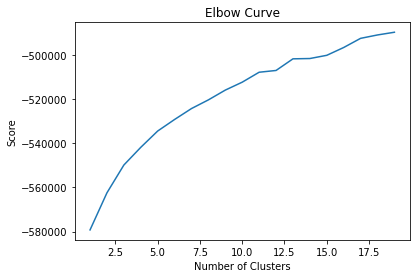

In [187]:
nc = range(1,20)
kmeans = []
score = []
kmeans = [KMeans(n_clusters = i, n_init = 100, max_iter = 500) for i in nc]               
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

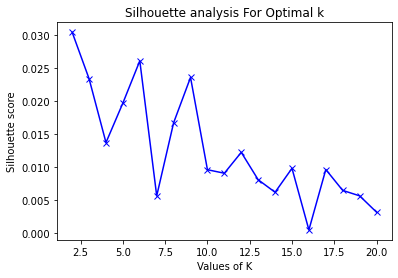

In [188]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [226]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

clusters={0:[], 1:[]}
df_new = articles_df
for i in range(857):
    clusters[kmeans.labels_[i]].append(''.join(df_new.loc[i, 'Title']))

In [227]:
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [228]:
clusters[0]

["Flashback: Biden praised ‘constant,' 'unrelenting’ stream of immigration into US",
 'Victor Davis Hanson: The dangerous, diminishing power of the independent American citizen',
 "Biden says in video he has created 'voter fraud organization'",
 "Marjorie Taylor Greene's personal Twitter account permanently suspended over COVID-19 ‘misinformation’",
 'Dems deploying DARPA-funded AI-driven information warfare tool to target pro-Trump accounts',
 'Biden accused of ‘moving goalposts’ on percentage of Americans who need to get jab to return normal',
 'Fox Corporation becomes stand-alone company as Disney deal set to close',
 'Judge issues stay against vaccine mandate for Navy SEALs seeking religious exemption',
 "Omicron, delta have fused into new 'deltacron' strain, Cyprus professor finds",
 'Deltacron: a new variant of COVID-19 or a lab contamination mishap?',
 "Barack Obama's Civilian Army",
 "Reps. Comer, Jordan expose new Fauci emails they say point to COVID-19 lab leak 'cover up'",
 

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [195]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [196]:
dtm = cv.fit_transform(articles_df['Text'])

In [197]:
dtm

<857x12267 sparse matrix of type '<class 'numpy.int64'>'
	with 164413 stored elements in Compressed Sparse Row format>

In [215]:
LDA = LatentDirichletAllocation(n_components=2,random_state=42)

In [199]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=2, random_state=42)

In [201]:
len(cv.get_feature_names_out())

12267

In [203]:
import random

for i in range(10):
    random_word_id = random.randint(0,12267)
    print(cv.get_feature_names()[random_word_id])

scare
post
russell
sanity
gower
ar
lower
financing
nj
promotes


In [204]:
len(LDA.components_)

2

In [205]:
LDA.components_

array([[  2.45169183, 219.12065574,   0.50008897, ...,   1.98786052,
          3.48615843,  16.49958872],
       [  5.54830817, 122.87934426,   4.49991103, ...,   4.01213948,
          0.51384157,   0.50041128]])

In [207]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['states', 'country', 'like', 'told', 'click', 'state', 'russian', 'new', 'russia', 'people', 'president', 'fox', 'ukraine', 'biden', 'said']


THE TOP 15 WORDS FOR TOPIC #1
['posted', 'russian', 'click', 'texas', 'old', 'city', 'people', 'according', 'year', 'shooting', 'told', 'school', 'fox', 'police', 'said']




In [208]:
topic_results = LDA.transform(dtm)

In [210]:
topic_results.argmax(axis=1)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [221]:
articles_df['Topic1'] = topic_results.argmax(axis=1)
articles_df['Topic2'] = kmeans.labels_

In [223]:
articles_df[articles_df['Topic1'] == articles_df['Topic2']]

,Unnamed: 0,Title,Authors,Text,Source,Topic1,Topic2
1,1,"Flashback: Biden praised ‘constant,' 'unrelent...",Adam Shaw,"\n\nPresident-elect Joe Biden, during the Obam...",https://www.foxnews.com,0,0
3,3,"Steve Carell, Seth Rogen among Hollywood stars...",Nate Day,\n\nHollywood stars are taking a stand.\n\nOn ...,https://www.foxnews.com,1,1
4,4,"Just one year after defund the police cuts, Po...",Emma Colton,\n\nA year after Portland cut funds to its pol...,https://www.foxnews.com,1,1
5,5,"Victor Davis Hanson: The dangerous, diminishin...",Victor Davis Hanson,\n\nThe last two years seem to have been one c...,https://www.foxnews.com,0,0
6,6,Biden says in video he has created 'voter frau...,Evie Fordham,\n\nDemocratic nominee Joe Biden said his team...,https://www.foxnews.com,0,0
...,...,...,...,...,...,...,...
851,1146,At least 181 K-12 educators charged with child...,Jessica Chasmar,"\n\nAt least 181 K-12 educators, including fou...",https://www.foxnews.com,1,1
852,1147,Mayor Bowser claims illegal immigrants crowdin...,Lindsay Kornick,\n\nWashington D.C. Mayor Muriel Bowser appear...,https://www.foxnews.com,0,0
854,1149,Minnesota state lawmaker ends reelection bid a...,Paulina Dedaj,\n\nMinnesota state Rep. Jim Knoblach announce...,https://www.foxnews.com,1,1
855,1150,Former lawmaker facing sex abuse probe was 'co...,Lukas Mikelionis,\n\nThe former Idaho state lawmaker who was fo...,https://www.foxnews.com,1,1


In [225]:
articles_df

,Unnamed: 0,Title,Authors,Text,Source,Topic1,Topic2
0,0,"New York, Florida shatter single-day records f...",Peter Aitken,\n\nNew York and Florida have both recorded th...,https://www.foxnews.com,0,1
1,1,"Flashback: Biden praised ‘constant,' 'unrelent...",Adam Shaw,"\n\nPresident-elect Joe Biden, during the Obam...",https://www.foxnews.com,0,0
2,2,Ron DeSantis accompanied wife to cancer treatm...,Kyle Morris,\n\nFlorida Republican Gov. Ron DeSantis accom...,https://www.foxnews.com,0,1
3,3,"Steve Carell, Seth Rogen among Hollywood stars...",Nate Day,\n\nHollywood stars are taking a stand.\n\nOn ...,https://www.foxnews.com,1,1
4,4,"Just one year after defund the police cuts, Po...",Emma Colton,\n\nA year after Portland cut funds to its pol...,https://www.foxnews.com,1,1
...,...,...,...,...,...,...,...
852,1147,Mayor Bowser claims illegal immigrants crowdin...,Lindsay Kornick,\n\nWashington D.C. Mayor Muriel Bowser appear...,https://www.foxnews.com,0,0
853,1148,Mueller witness George Nader pleads guilty to ...,Gregg Re,\n\nA political hobnobber who featured promine...,https://www.foxnews.com,1,0
854,1149,Minnesota state lawmaker ends reelection bid a...,Paulina Dedaj,\n\nMinnesota state Rep. Jim Knoblach announce...,https://www.foxnews.com,1,1
855,1150,Former lawmaker facing sex abuse probe was 'co...,Lukas Mikelionis,\n\nThe former Idaho state lawmaker who was fo...,https://www.foxnews.com,1,1


In [224]:
539/857

0.6289381563593932

In [214]:
LDA2 = LatentDirichletAllocation(n_components=2,random_state=420)